In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import make_regression, make_classification

In [14]:
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

In [4]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)

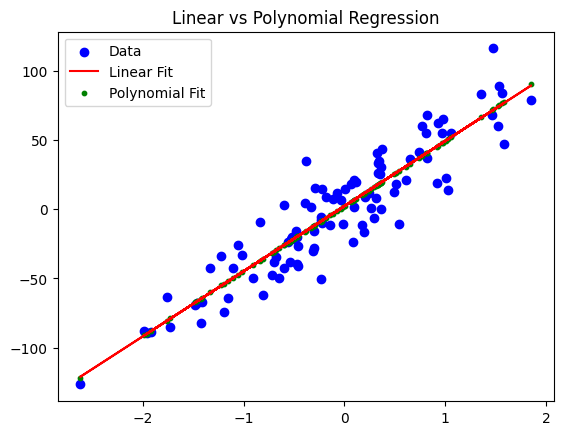

In [15]:
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, y_pred_lin, color="red", label="Linear Fit")
plt.scatter(X, y_pred_poly, color="green", s=10, label="Polynomial Fit")
plt.legend()
plt.title("Linear vs Polynomial Regression")
plt.show()

In [6]:
print("Linear Regression MSE:", mean_squared_error(y, y_pred_lin))
print("Polynomial Regression MSE:", mean_squared_error(y, y_pred_poly))

Linear Regression MSE: 312.21700168495596
Polynomial Regression MSE: 312.15461496536204


In [16]:
X_cls, y_cls = make_classification(
n_samples=200, n_features=2, n_informative=2, n_redundant=0,
n_classes=2, random_state=42
)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_cls, y_cls)
y_pred_cls = log_reg.predict(X_cls)

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(y_cls, y_pred_cls))

Logistic Regression Accuracy: 0.865


In [19]:
x_min, x_max = X_cls[:, 0].min() - 1, X_cls[:, 0].max() + 1
y_min, y_max = X_cls[:, 1].min() - 1, X_cls[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

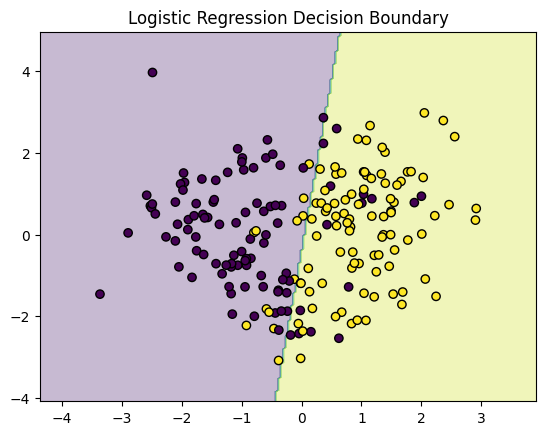

In [20]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_cls[:, 0], X_cls[:, 1], c=y_cls, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.show()